### What is React prompting

React Prompting is a technique used with language models like GPT-3 to guide and modify the generated text based on additional instructions or context provided within the prompt itself. It allows users to influence the behavior and content of the model's response by adding specific instructions, constraints, or modifiers to the input text. React Prompting helps make the language model's output more tailored and aligned with the user's intentions.

When using React Prompting, you start with an initial prompt that sets the context for the generated text. The prompt typically contains a question or a statement that instructs the language model to perform a specific task or provide certain information. The model then generates a response based on this prompt.

However, in React Prompting, you add a second part called the "react_text" to the prompt. This react_text includes additional instructions or modifiers that react to the generated text. The react_text can be used to adjust or guide the model's output by providing new constraints, context, or emotional tone.

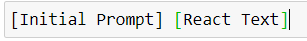

In [11]:
# !pip install openai
# !pip install transformers


In [6]:
# [Initial Prompt] [React Text]

In [ ]:
import openai
from transformers import GPT2Tokenizer

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import json
with open(r'D:\Data Science\OpenAI_key management\key.json') as config_file:
    config = json.load(config_file)
    api_key = config['api_key']

In [15]:
openai.api_key = api_key

# Initialize the GPT2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

def react_prompting_demo(prompt, react_text):
    input_text = f"{prompt} {react_text}"

    # Request the completion from the OpenAI GPT-3.5 model
    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=input_text,
        temperature=0.7,
        max_tokens=100,
        n=1,
        stop=None,
    )

    # Extract the generated text from the API response
    generated_text = response['choices'][0]['text']

    # Return the generated text
    return generated_text.strip()

if __name__ == "__main__":
    prompt = "You are a helpful assistant. Provide a description of a cute puppy."     # Sample Prompt
    react_text = "However, you are in a sad mood." # react_text that modifies the generated text

    # Generate text using React Prompting
    generated_text = react_prompting_demo(prompt, react_text)
    n_tokens = len(tokenizer.encode(generated_text)) # Number of tokens in prompt
    cost_usd = (n_tokens * 0.002) / 1000 # Cost in USD
    exchange_rate_usd_to_inr = 82.78 # Exchange Rate USD to INR
    cost_inr = cost_usd * exchange_rate_usd_to_inr #Converting USD to INR
    
    # Display the generated text and number of tokens
    print("Generated Text:")
    print(generated_text)
    print("Number of Tokens:{}".format(n_tokens))
    print("Cost in USD: {}".format(cost_usd))
    print("Cost in INR:", cost_inr)

Generated Text:
This cute little puppy is a bundle of joy, but my heart aches when I look at him. He has the most beautiful golden fur that glistens in the sunlight, and his big, brown eyes are full of life and love. He's always ready to play and loves to cuddle up against you for a nap. He brings a smile to my face, but it's hard to not feel a bit of sadness when I think of all the potential he has, and that
Number of Tokens:98
Cost in USD: 0.00019600000000000002
Cost in INR: 0.01622488
